In [1]:
!pip install pandas

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
from sklearn.ensemble import IsolationForest

In [10]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [11]:
import seaborn as sns

In [5]:
df = pd.read_csv('records_v2.csv')

In [14]:
print(df.head())

   id  reading      reading_time  Fuel Volume (L)
0   1    23.02  11/20/2025 17:17            12.63
1   2    23.22  11/20/2025 17:17            12.46
2   3    23.22  11/20/2025 17:18            12.46
3   4    23.22  11/20/2025 17:18            12.46
4   5    23.22  11/20/2025 17:18            12.46


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               899 non-null    int64  
 1   reading          897 non-null    float64
 2   reading_time     899 non-null    object 
 3   Fuel Volume (L)  896 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.2+ KB
None


In [16]:
print(df.describe())

               id     reading  Fuel Volume (L)
count  899.000000  897.000000       896.000000
mean   450.000000   28.301126         8.109275
std    259.663243    3.547058         3.035831
min      1.000000   22.860000         0.000000
25%    225.500000   25.380000         7.720000
50%    450.000000   28.760000         7.720000
75%    674.500000   28.760000        10.610000
max    899.000000   37.780000        12.780000


In [17]:
print(df.isnull().sum())

id                 0
reading            2
reading_time       0
Fuel Volume (L)    3
dtype: int64


In [19]:
df['reading_time'] = pd.to_datetime(df['reading_time'])

In [20]:
df = df.sort_values('reading_time')

In [21]:
df.dropna(subset=['Fuel Volume (L)', 'reading', 'reading_time'], inplace=True)

In [22]:
df['reading_time'] = pd.to_datetime(df['reading_time'])

In [23]:
df = df.sort_values('reading_time')

In [24]:
df['volume_diff'] = df['Fuel Volume (L)'].diff()

In [35]:
import matplotlib.dates as mdates

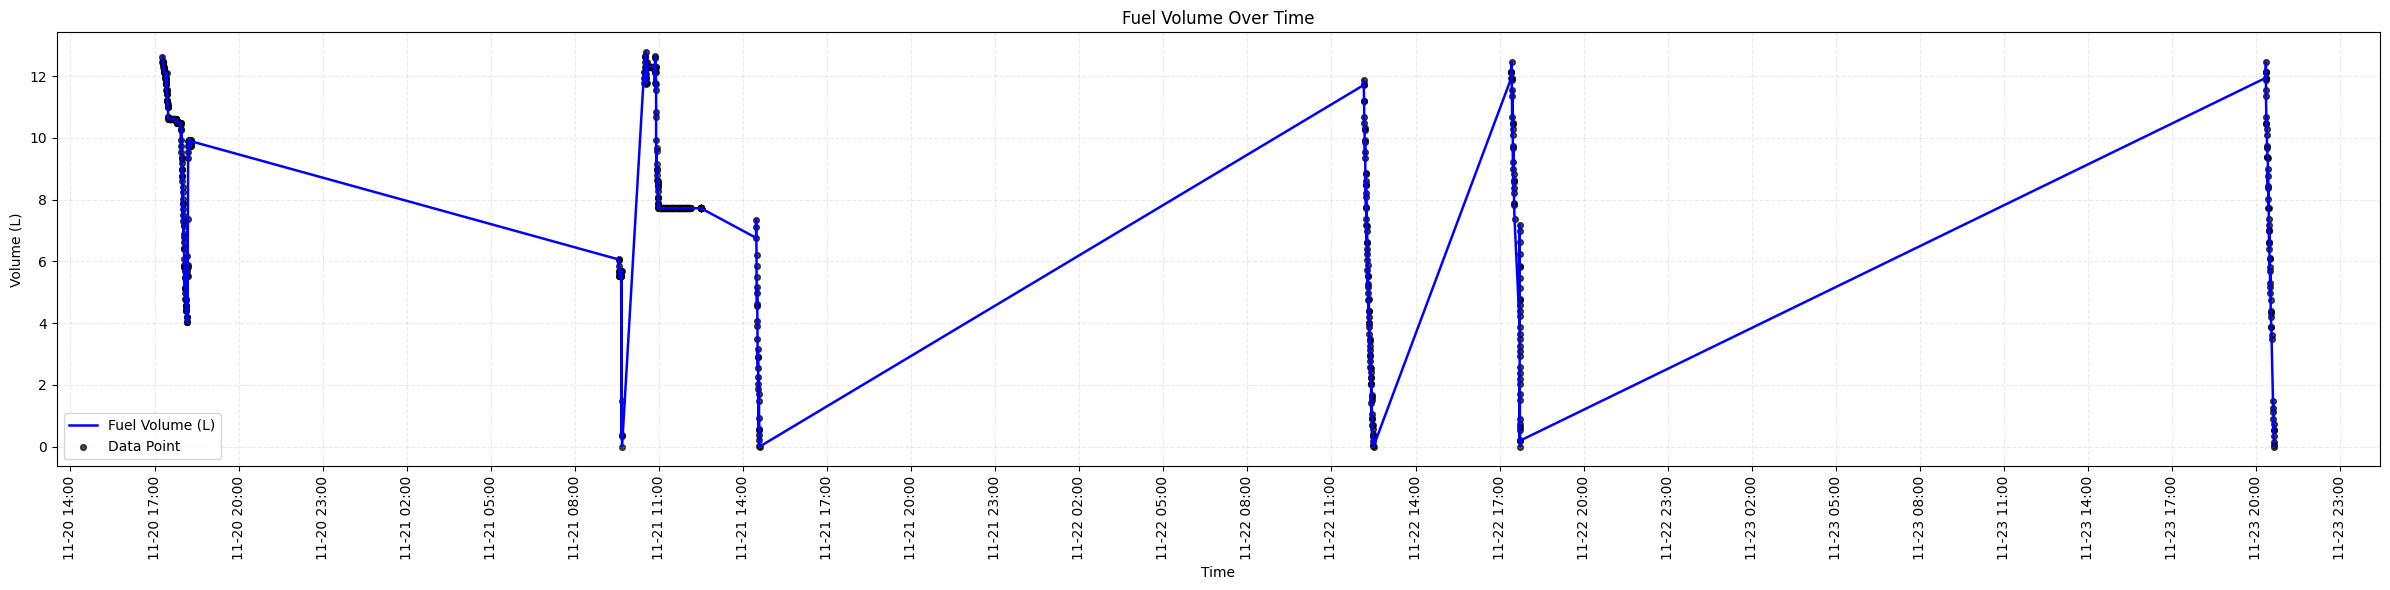

In [ ]:
plt.figure(figsize=(24, 6))  # Wider for dense time axis

# Scatter and line for clarity
plt.plot(df['reading_time'], df['Fuel Volume (L)'], color='blue', label='Fuel Volume (L)', linewidth=1.8)
plt.scatter(df['reading_time'], df['Fuel Volume (L)'], color='black', s=17, label='Data Point', alpha=0.7)

plt.title('Fuel Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume (L)')
plt.legend()

# Major ticks every 3 hours, show hour+minute+date
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', alpha=0.25)
plt.tight_layout()

plt.show()

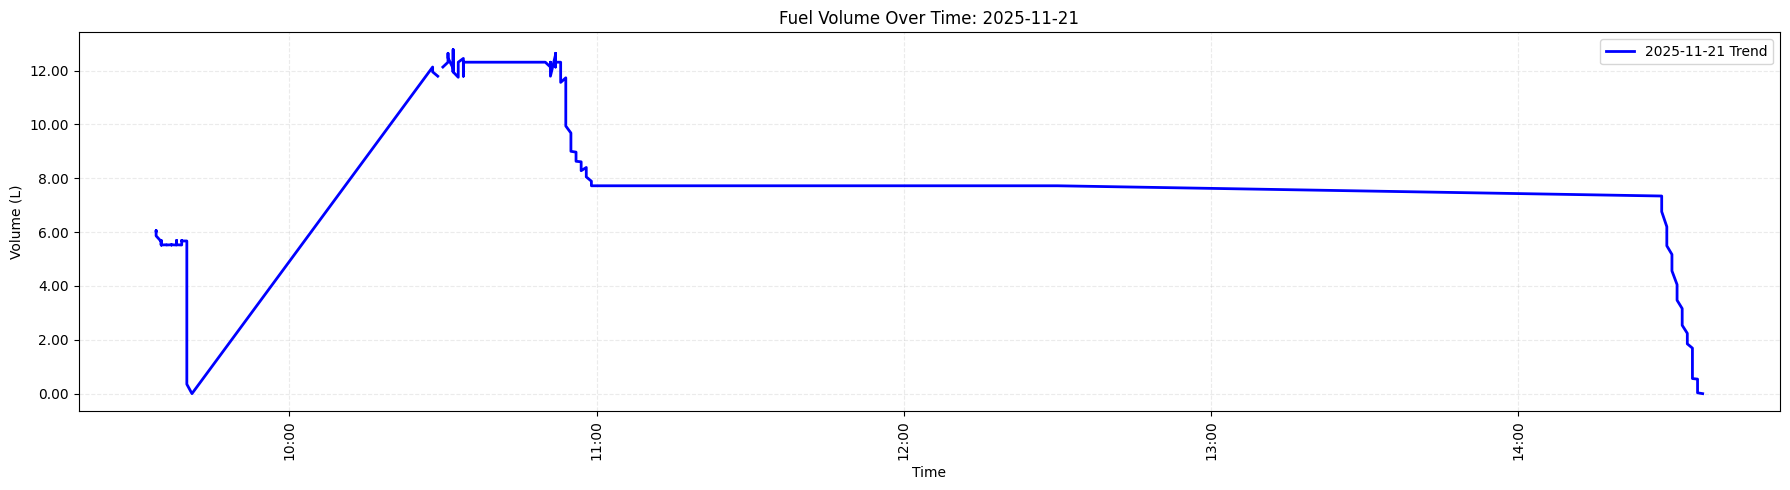

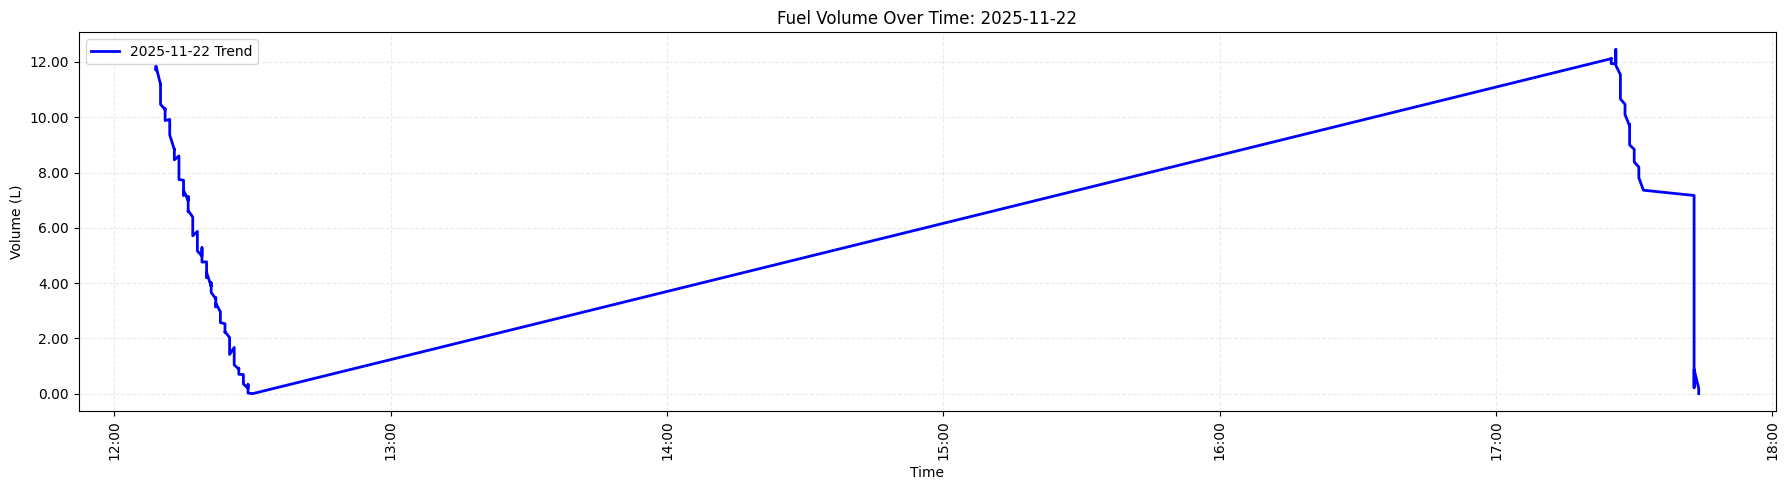

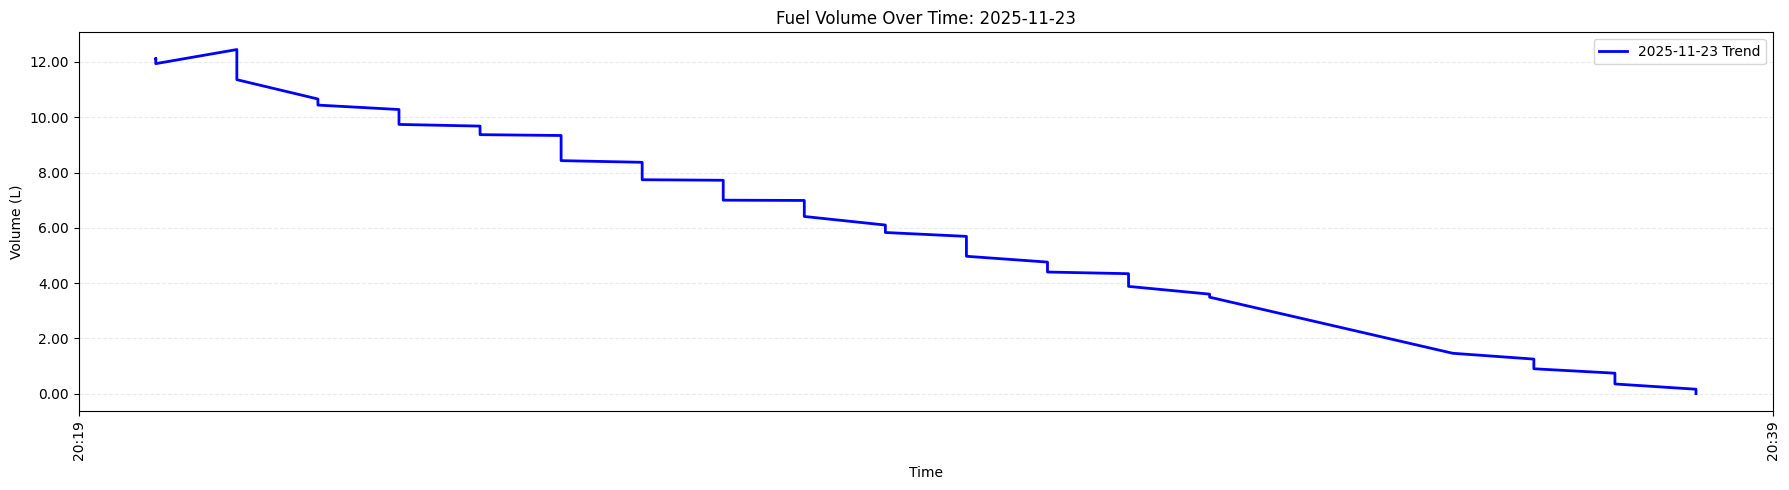

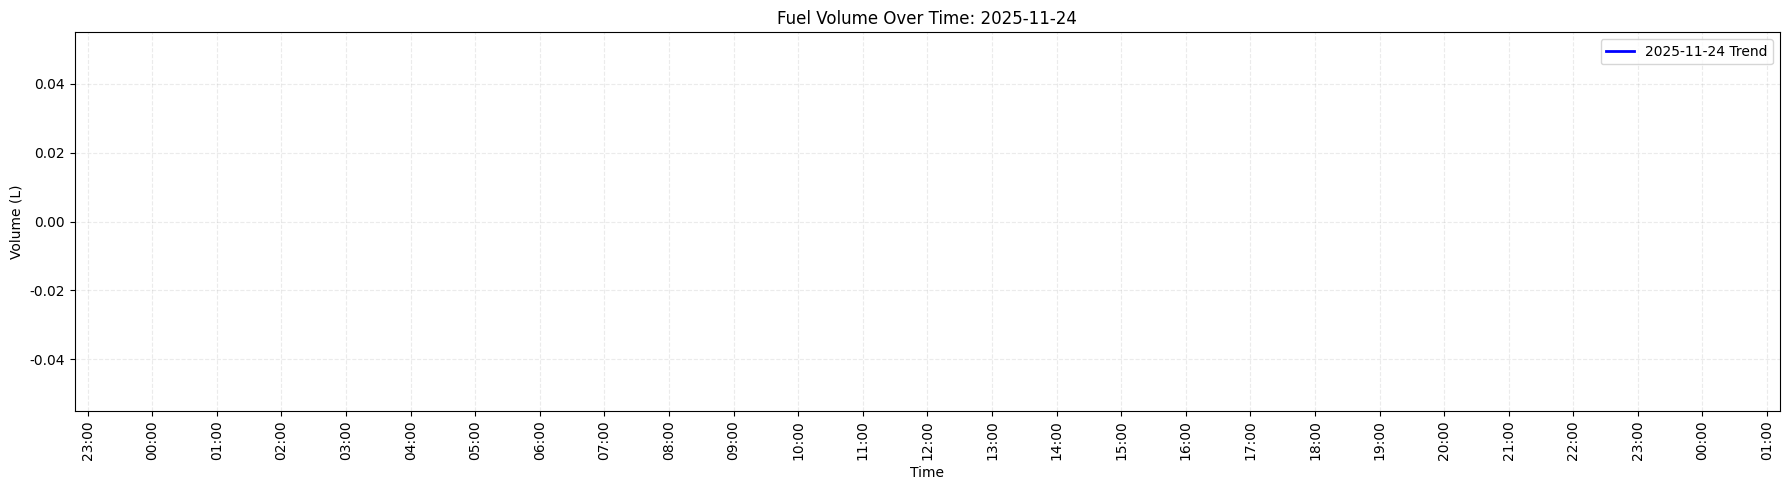

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Load and preprocess the data
df = pd.read_csv('records.csv')
df['Fuel Volume (L)'] = pd.to_numeric(df['Fuel Volume (L)'], errors='coerce')
df['reading_time'] = pd.to_datetime(df['reading_time'], errors='coerce')
df = df.sort_values(['reading_time', 'id'])

days_of_interest = ['2025-11-21', '2025-11-22', '2025-11-23', '2025-11-24']

for date_str in days_of_interest:
    day_mask = df['reading_time'].dt.strftime('%Y-%m-%d') == date_str
    day_df = df[day_mask]

    plt.figure(figsize=(18, 5))
    # Line graph: connects data points
    plt.plot(day_df['reading_time'], day_df['Fuel Volume (L)'],
             color='blue', linewidth=2, label=f'{date_str} Trend')
    plt.title(f'Fuel Volume Over Time: {date_str}')
    plt.xlabel('Time')
    plt.ylabel('Volume (L)')
    plt.legend()

    plt.gca().xaxis.set_major_locator(mdates.HourLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

    plt.xticks(rotation=90)
    plt.grid(True, which='both', linestyle='--', alpha=0.25)
    plt.tight_layout()
    plt.show()


In [45]:
df['volume_diff'] = df['Fuel Volume (L)'].diff()

In [48]:
print(df)

      id  reading        reading_time  Fuel Volume (L)  volume_diff  anomaly
0      1    23.02 2025-11-20 17:17:00            12.63          NaN      NaN
1      2    23.22 2025-11-20 17:17:00            12.46        -0.17      1.0
2      3    23.22 2025-11-20 17:18:00            12.46         0.00      1.0
3      4    23.22 2025-11-20 17:18:00            12.46         0.00      1.0
4      5    23.22 2025-11-20 17:18:00            12.46         0.00      1.0
..   ...      ...                 ...              ...          ...      ...
893  894    37.13 2025-11-23 20:38:00             0.55        -0.19      1.0
895  896    37.37 2025-11-23 20:38:00             0.35        -0.20      1.0
896  897    37.59 2025-11-23 20:39:00             0.16        -0.19      1.0
897  898    37.73 2025-11-23 20:39:00             0.04        -0.12      1.0
898  899    37.78 2025-11-23 20:39:00             0.00        -0.04      1.0

[896 rows x 6 columns]


In [56]:
diff = df[['volume_diff']].dropna()

In [57]:
iso = IsolationForest(contamination=0.01, random_state=42)
labels = iso.fit_predict(diff)

In [58]:
df.loc[diff.index, 'iso_outlier'] = labels

In [59]:
iso_outliers = df[df['iso_outlier'] == -1]
print(iso_outliers[['reading_time', 'Fuel Volume (L)', 'volume_diff']])

           reading_time  Fuel Volume (L)  volume_diff
209 2025-11-20 18:12:00             9.55         3.66
257 2025-11-21 09:40:00             0.35        -5.34
254 2025-11-21 09:40:00             5.67         5.30
255 2025-11-21 09:40:00             1.48        -4.19
259 2025-11-21 10:28:00            12.13        12.13
704 2025-11-22 12:09:00            11.71        11.71
785 2025-11-22 17:25:00            11.94        11.94
831 2025-11-22 17:43:00             1.69        -4.14
844 2025-11-23 20:20:00            11.94        11.75


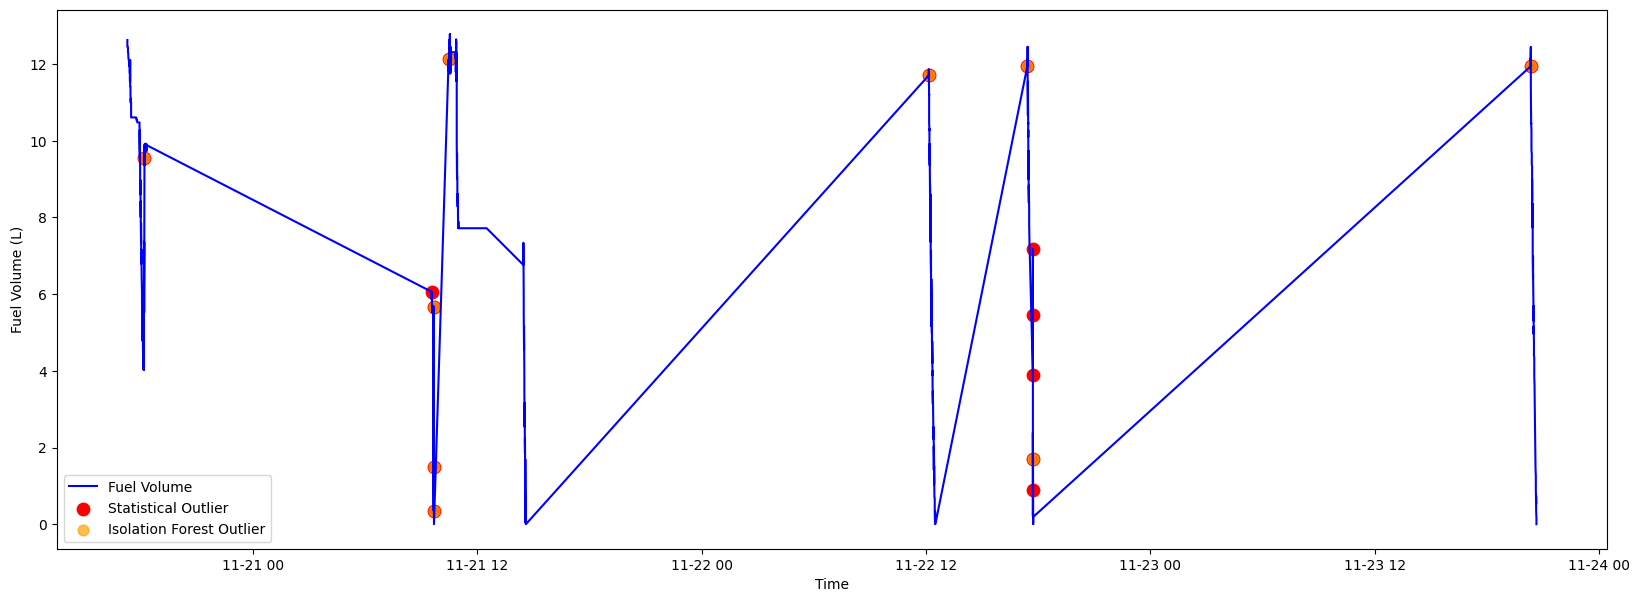

In [60]:
plt.figure(figsize=(20, 7))
plt.plot(df['reading_time'], df['Fuel Volume (L)'], label='Fuel Volume', color='blue')
plt.scatter(outliers['reading_time'], outliers['Fuel Volume (L)'], color='red', s=80, label='Statistical Outlier')
plt.scatter(iso_outliers['reading_time'], iso_outliers['Fuel Volume (L)'], color='orange', s=60, label='Isolation Forest Outlier', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Fuel Volume (L)')
plt.legend()
plt.show()

In [61]:
df['rolling_mean'] = df['Fuel Volume (L)'].rolling(window=5).mean()
df['rolling_std'] = df['Fuel Volume (L)'].rolling(window=5).std()

In [62]:
df['hour'] = df['reading_time'].dt.hour
df['day_of_week'] = df['reading_time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'] >= 5

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['volume_diff_scaled'] = scaler.fit_transform(df[['volume_diff']].fillna(0))

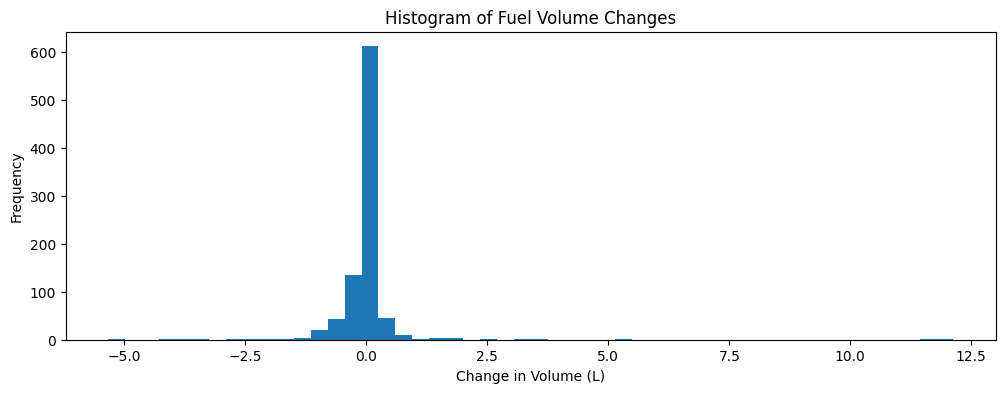

In [64]:
plt.figure(figsize=(12, 4))
plt.hist(df['volume_diff'].dropna(), bins=50)
plt.title('Histogram of Fuel Volume Changes')
plt.xlabel('Change in Volume (L)')
plt.ylabel('Frequency')
plt.show()

In [65]:
from sklearn.ensemble import IsolationForest

# Use only non-NaN volume_diff for training
features = df[['volume_diff', 'rolling_mean', 'rolling_std']].dropna()

iso_model = IsolationForest(contamination=0.01, random_state=42)
iso_model.fit(features)

# Predict anomalies: -1 = anomaly, 1 = normal
iso_labels = iso_model.predict(features)
df.loc[features.index, 'anomaly_flag'] = iso_labels

In [66]:
# Extract anomalies for reporting
anomalies = df[df['anomaly_flag'] == -1]
print("Detected anomalies:")
print(anomalies[['reading_time', 'Fuel Volume (L)', 'volume_diff', 'rolling_mean', 'rolling_std']])

Detected anomalies:
           reading_time  Fuel Volume (L)  volume_diff  rolling_mean  \
257 2025-11-21 09:40:00             0.35        -5.34         4.550   
254 2025-11-21 09:40:00             5.67         5.30         3.520   
255 2025-11-21 09:40:00             1.48        -4.19         2.712   
259 2025-11-21 10:28:00            12.13        12.13         3.930   
263 2025-11-21 10:30:00            12.13         0.34         9.600   
704 2025-11-22 12:09:00            11.71        11.71         2.530   
785 2025-11-22 17:25:00            11.94        11.94         2.500   
784 2025-11-22 17:25:00            12.13         0.19         4.888   
844 2025-11-23 20:20:00            11.94        11.75         3.600   

     rolling_std  
257     2.349245  
254     2.885429  
255     2.747730  
259     5.108537  
263     5.368436  
704     5.136852  
785     5.278736  
784     6.525877  
844     4.889330  


In [68]:
df['prev_fuel_volume'] = df['Fuel Volume (L)'].shift(1)

In [69]:
# A refill is legitimate if previous volume == 0 and the current volume is large
df['legit_refill'] = (df['prev_fuel_volume'] == 0) & (df['volume_diff'] > 2)  # Adjust threshold as needed

In [70]:
df['anomaly_flag_corrected'] = df['anomaly_flag']  # Copy initial model output
df.loc[df['legit_refill'], 'anomaly_flag_corrected'] = 1  # Set to "normal"

In [72]:
df.index = range(1, len(df) + 1)

In [6]:
import pandas as pd

# 1. Load the CSV with correct column types
df = pd.read_csv('records.csv')
df['Fuel Volume (L)'] = pd.to_numeric(df['Fuel Volume (L)'], errors='coerce')
df['reading_time'] = pd.to_datetime(df['reading_time'], errors='coerce')

# 2. Sort dataset by timestamp (and optionally by id to break ties)
df = df.sort_values(['reading_time', 'id'])

# 3. Calculate the difference in fuel volume using the sorted data
df['volume_diff'] = df['Fuel Volume (L)'].diff()
df['prev_fuel_volume'] = df['Fuel Volume (L)'].shift(1)

# 4. Define anomaly detection threshold
THRESHOLD = 2  # Adjust based on what is "unexpected" in your station

# 5. Exclude refills (i.e., skip increments after the tank was empty)
anomaly_mask = (
    (df['prev_fuel_volume'] != 0) &                # Don't flag refills after empty
    (abs(df['volume_diff']) > THRESHOLD)           # Only flag large jumps/reductions
)

# 6. Present anomalies with full info and traceable IDs
anomalies = df[anomaly_mask][['id', 'reading_time', 'Fuel Volume (L)', 'volume_diff', 'prev_fuel_volume']]
print(anomalies)


      id        reading_time  Fuel Volume (L)  volume_diff  prev_fuel_volume
232  233 2025-11-21 09:34:00             6.04        -3.85              9.89
255  256 2025-11-21 09:40:00             1.48        -4.19              5.67
888  889 2025-11-23 20:36:00             1.46        -2.03              3.49


In [7]:
df['Fuel Volume (L)'] = pd.to_numeric(df['Fuel Volume (L)'], errors='coerce')
df['reading_time'] = pd.to_datetime(df['reading_time'], errors='coerce')

# Sort by time, then by id (if needed)
df = df.sort_values(['reading_time', 'id'])

# Calculate difference and previous volume
df['volume_diff'] = df['Fuel Volume (L)'].diff()
df['prev_fuel_volume'] = df['Fuel Volume (L)'].shift(1)

In [9]:
feature_cols = ['volume_diff']  # You can add more columns here for deeper context
X = df[feature_cols].dropna()


In [10]:
from sklearn.ensemble import IsolationForest

iso_model = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination to tune sensitivity
iso_model.fit(X)

# Predict anomalies: -1 = anomaly, 1 = normal
df.loc[X.index, 'iso_flag'] = iso_model.predict(X)

In [11]:
# Refills after zero should not be treated as anomalies, even if large
legit_refill_mask = (df['prev_fuel_volume'] == 0) & (df['volume_diff'] > 0)
df.loc[legit_refill_mask, 'iso_flag'] = 1  # Mark these as normal

In [12]:
anomalies = df[df['iso_flag'] == -1][['id', 'reading_time', 'Fuel Volume (L)', 'volume_diff', 'prev_fuel_volume']]
print(anomalies)

      id        reading_time  Fuel Volume (L)  volume_diff  prev_fuel_volume
33    34 2025-11-20 17:26:00            12.10         0.56             11.54
34    35 2025-11-20 17:26:00            11.42        -0.68             12.10
200  201 2025-11-20 18:10:00             5.52         1.49              4.03
201  202 2025-11-20 18:10:00             5.69         0.17              5.52
202  203 2025-11-20 18:10:00             6.16         0.47              5.69
..   ...                 ...              ...          ...               ...
838  839 2025-11-22 17:44:00             0.19        -0.69              0.88
840  841 2025-11-23 20:21:00            12.45         0.51             11.94
846  847 2025-11-23 20:21:00            11.88        -0.57             12.45
849  850 2025-11-23 20:22:00            10.66        -0.70             11.36
888  889 2025-11-23 20:36:00             1.46        -2.03              3.49

[83 rows x 5 columns]


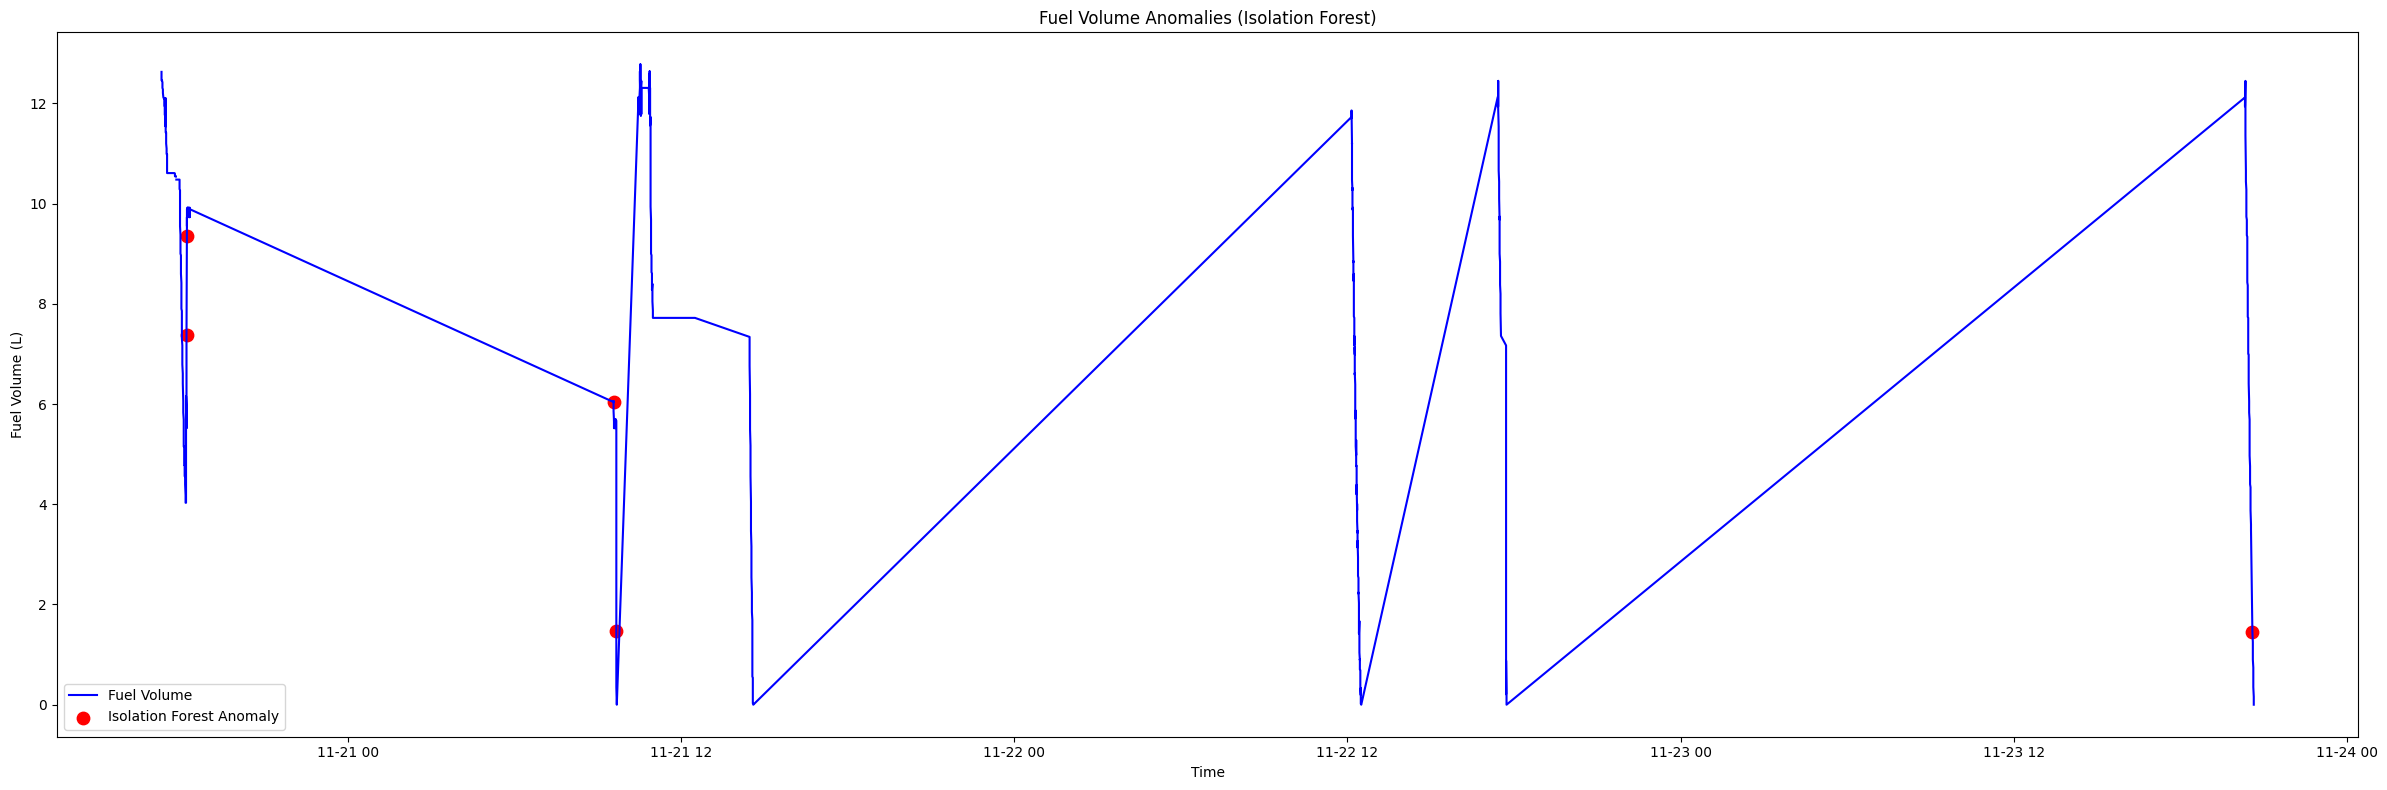

In [82]:
plt.figure(figsize=(24,8))
plt.plot(df['reading_time'], df['Fuel Volume (L)'], label='Fuel Volume', color='blue')
plt.scatter(anomalies['reading_time'], anomalies['Fuel Volume (L)'], color='red', label='Isolation Forest Anomaly', s=80)
plt.xlabel('Time')
plt.ylabel('Fuel Volume (L)')
plt.legend()
plt.title('Fuel Volume Anomalies (Isolation Forest)')
plt.tight_layout()
plt.show()

In [83]:
df['rolling_mean'] = df['Fuel Volume (L)'].rolling(window=5).mean()
df['rolling_std'] = df['Fuel Volume (L)'].rolling(window=5).std()
feature_cols = ['volume_diff', 'rolling_mean', 'rolling_std']
X = df[feature_cols].dropna()


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
print(anomalies[['id', 'reading_time', 'Fuel Volume (L)', 'volume_diff', 'prev_fuel_volume']])

      id        reading_time  Fuel Volume (L)  volume_diff  prev_fuel_volume
33    34 2025-11-20 17:26:00            12.10         0.56             11.54
34    35 2025-11-20 17:26:00            11.42        -0.68             12.10
200  201 2025-11-20 18:10:00             5.52         1.49              4.03
201  202 2025-11-20 18:10:00             5.69         0.17              5.52
202  203 2025-11-20 18:10:00             6.16         0.47              5.69
..   ...                 ...              ...          ...               ...
838  839 2025-11-22 17:44:00             0.19        -0.69              0.88
840  841 2025-11-23 20:21:00            12.45         0.51             11.94
846  847 2025-11-23 20:21:00            11.88        -0.57             12.45
849  850 2025-11-23 20:22:00            10.66        -0.70             11.36
888  889 2025-11-23 20:36:00             1.46        -2.03              3.49

[83 rows x 5 columns]


In [15]:
df['true_anomaly'] = 0  # assume all records are normal at first


In [16]:
df.loc[df['id'].isin([207, 208, 233, 256, 889]), 'true_anomaly'] = 1  # Mark true anomalies by ID

In [17]:
# Check column existence
print(df.columns)

# Proper mask creation (no missing values in both columns)
mask = df['true_anomaly'].notnull() & df['iso_flag'].notnull()

# Filter DataFrame using mask
y_true = df.loc[mask, 'true_anomaly']
y_pred = (df.loc[mask, 'iso_flag'] == -1).astype(int)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))


Index(['id', 'reading', 'reading_time', 'Fuel Volume (L)', 'volume_diff',
       'prev_fuel_volume', 'iso_flag', 'true_anomaly'],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       888
           1       0.06      1.00      0.11         5

    accuracy                           0.91       893
   macro avg       0.53      0.96      0.53       893
weighted avg       0.99      0.91      0.95       893

